In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [27]:
#Tectonic TEAX25C10-8/SP
f = np.linspace(1, 2e4 , 10000)
w = f * 2 * np.pi
Rdc = 8
Lin = 0.22e-3
L = 3.79e-3
C = 50e-6
R = 63.6
fs = 44100

Text(0, 0.5, 'Rad')

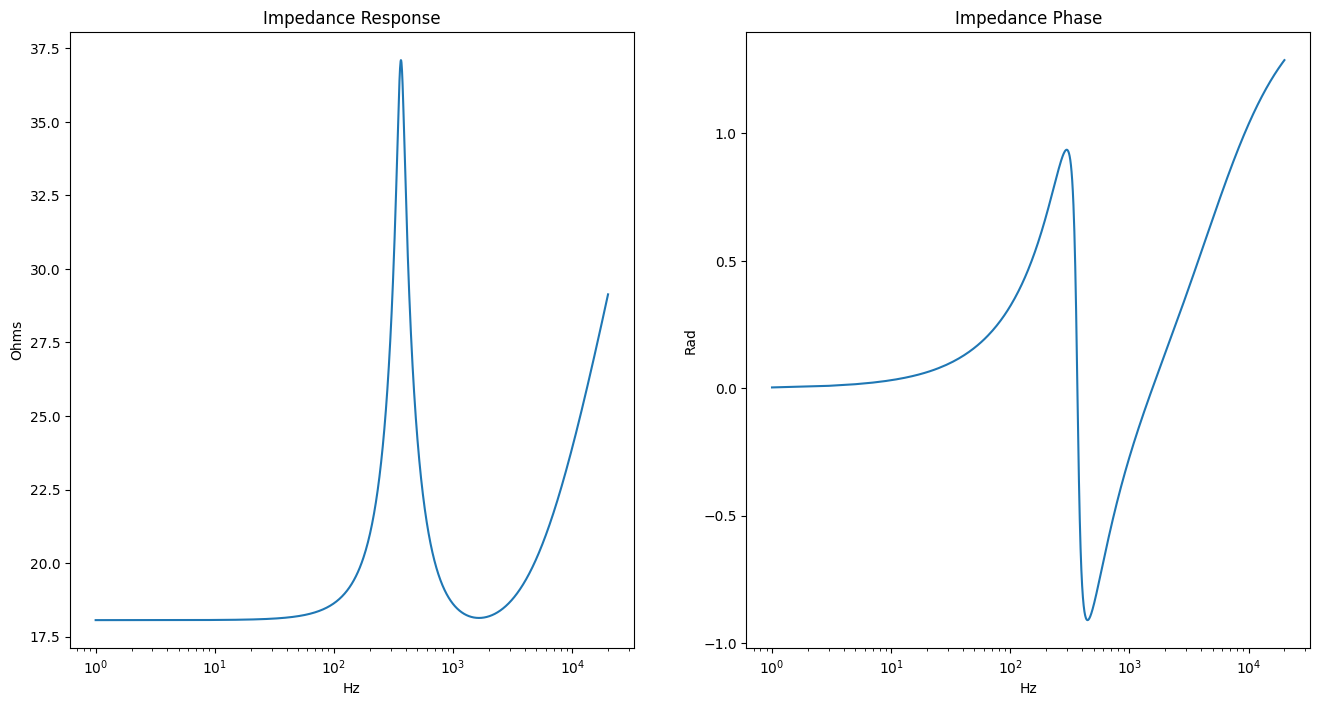

In [28]:
#Circuit Simulation Impedance Response
Z = Rdc + 1j*w*Lin + 1/((1/(1j*w*L)) + (1/R) + 1j*w*C)
plt.figure(figsize=(16, 8)) 
plt.subplot(1, 2, 1)
plt.plot(f, np.log10(np.abs(Z))*20)
plt.xscale('log')
plt.title("Impedance Response")
plt.xlabel("Hz")
plt.ylabel("Ohms")

plt.subplot(1, 2, 2)
plt.plot(f, np.angle(Z))
plt.xscale('log')
plt.title("Impedance Phase")
plt.xlabel("Hz")
plt.ylabel("Rad")

Text(0.5, 1.0, 'Analog Filter Phase Response')

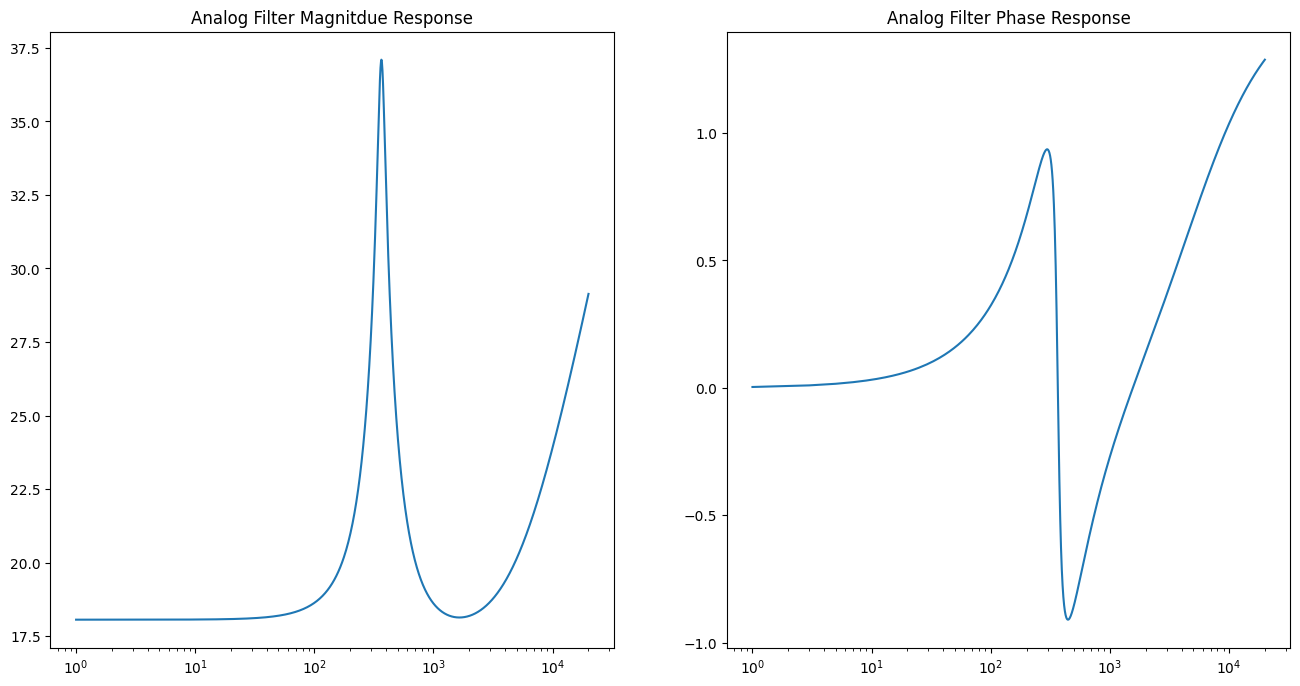

In [29]:
#Impedance Response to Analog Filter. (Derived by hand)
b = [Lin*L*R*C, Lin*L+L*R*C*Rdc, L*R + L*Rdc+R*Lin, Rdc*R]
a = [L*R*C, L, R]

plt.figure(figsize=(16, 8)) 
_, h = signal.freqs(b, a, w)
f = w / 2 / np.pi
plt.subplot(1, 2, 1)
plt.plot(f, np.log10(np.abs(h))*20)
plt.xscale('log')
plt.title('Analog Filter Magnitdue Response')

plt.subplot(1, 2, 2)
plt.plot(f, np.angle(h))
plt.xscale('log')
plt.title('Analog Filter Phase Response')

In [30]:
#Digital Filter using bilinear
bz, az = signal.bilinear(b, a, 44100)
bz, az

(array([ 27.62979914, -65.71757221,  49.67982786, -11.54882388]),
 array([ 1.        , -0.99019747, -0.99729807,  0.9928994 ]))

Text(0.5, 1.0, 'Digital Filter Phase Response')

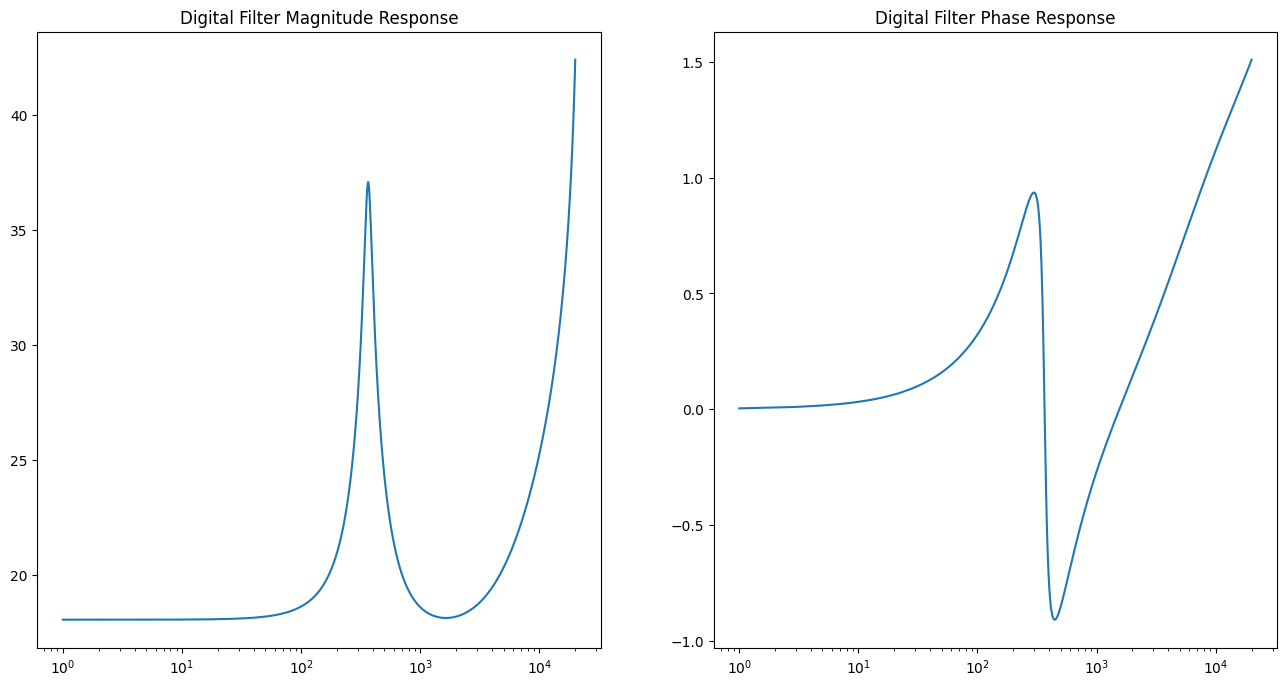

In [40]:
wz, hz = signal.freqz(bz, az, worN = f, fs = fs)

plt.figure(figsize=(16, 8)) 
plt.subplot(1, 2, 1)
plt.plot(f, 20*np.log10(np.abs(hz)))
plt.xscale('log')
plt.title('Digital Filter Magnitude Response')

plt.subplot(1, 2, 2)
plt.plot(f, np.angle(hz))
plt.xscale('log')
plt.title('Digital Filter Phase Response')